# Import Necessary Libraries

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from scipy.stats import zscore
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Read the File

In [251]:
bank_df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv', sep=',')

In [252]:
bank_df.sample(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3017,3018,57,32,68,90041,2,3.70,1,184,0,0,0,0,0
4398,4399,63,37,61,91942,1,2.50,3,0,0,0,0,0,0
4928,4929,57,33,28,90245,1,1.20,3,98,0,0,0,1,0
37,38,51,25,71,95814,1,1.40,3,198,0,0,0,0,0
2210,2211,58,33,51,95006,2,1.90,2,0,0,0,0,0,0
2176,2177,41,14,51,91320,3,2.33,2,0,0,0,0,1,0
4672,4673,52,26,180,95831,1,1.70,1,550,0,0,0,1,0
4718,4719,32,6,35,91107,3,1.00,1,0,0,1,0,1,0
993,994,41,15,185,91775,1,3.60,2,0,1,0,0,0,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0


In [253]:
bank_df.shape

(5000, 14)

In [254]:
bank_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

# Remove the ID Column from the DataFrame

In [255]:
bank_df.drop('ID', axis=1, inplace=True)

In [256]:
bank_df.head(5)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Check For Missing Values

In [257]:
bank_df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [258]:
bank_df.groupby(['ZIP Code']).count()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ZIP Code,,,,,,,,,,,,
9307,1,1,1,1,1,1,1,1,1,1,1,1
90005,5,5,5,5,5,5,5,5,5,5,5,5
90007,6,6,6,6,6,6,6,6,6,6,6,6
90009,8,8,8,8,8,8,8,8,8,8,8,8
90011,3,3,3,3,3,3,3,3,3,3,3,3
90016,2,2,2,2,2,2,2,2,2,2,2,2
90018,4,4,4,4,4,4,4,4,4,4,4,4
90019,5,5,5,5,5,5,5,5,5,5,5,5
90024,50,50,50,50,50,50,50,50,50,50,50,50


# Exploratory Data Analysis

# Univariate Analysis

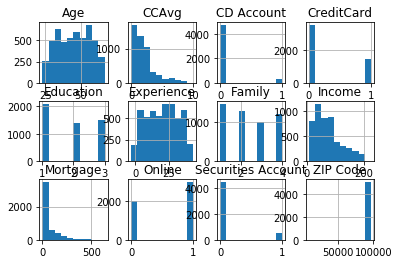

In [259]:
fig, ax = plt.subplots(3,4)

bank_df.hist(column=['Age','Experience','Income','ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account',
                     'CD Account', 'Online', 'CreditCard'], ax = ax, figsize=fig)

plt.show()

Observations
-------------------

1. None of the features are Normally Distributed

In [260]:
import matplotlib.patches as mpatches

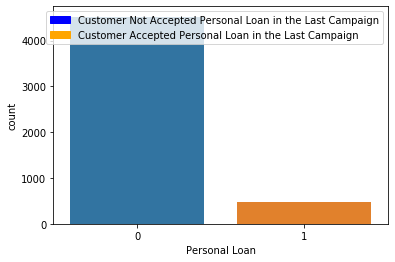

In [261]:
not_accepted_personal_loan = mpatches.Patch(color='blue', label='Customer Not Accepted Personal Loan in the Last Campaign')

accepted_personal_loan = mpatches.Patch(color='orange', label='Customer Accepted Personal Loan in the Last Campaign')

sns.countplot(bank_df['Personal Loan'])
plt.legend(handles=[not_accepted_personal_loan, accepted_personal_loan])
plt.show()

Observations
-------------------

1. The number of customers who accepted the personal loan is very less in number when compared to the customers who didn't accepted the personal loan

2. The given dataset is an imbalanced one.

In [262]:
bank_df.groupby(bank_df['Personal Loan']).count()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480


# Five Point Summary Statistics

In [263]:
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


Observations
-------------------

1. The Experience minimum value is -3. In reality, there will be no negative experience.

2. The Personal Loan, Securities Account, CD Account features having values mostly 0 because from the five point summary statistics, we can observe that the min, 25% percentile, 50% Percentile, 75% percentile values are 0 i.e. more number of customers are not having Personal Loan, Securities Account and CD Account.

In [264]:
filter1 = bank_df['Experience'] < 0

bank_df[filter1]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [265]:
bank_df[filter1].shape

(52, 13)

Observations
------------

1. There are total 52 data points which are having Experience less than 0.

2. Replace the negative experience values in these 52 data points with 0.

In [266]:
bank_df.loc[filter1,'Experience'] = 0

In [267]:
bank_df[filter1].head(5)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,0,113,94303,4,2.30,3,0,0,0,0,0,1
226,24,0,39,94085,2,1.70,2,0,0,0,0,0,0
315,24,0,51,90630,3,0.30,3,0,0,0,0,1,0
451,28,0,48,94132,2,1.75,3,89,0,0,0,1,0
524,24,0,75,93014,4,0.20,1,0,0,0,0,1,0


Correlation
----------------

In [268]:
corr_matrix = bank_df.corr()

In [269]:
corr_matrix

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994198,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994198,1.000000,-0.046729,-0.028783,-0.052213,-0.049912,0.013536,-0.010840,-0.007858,-0.001111,0.010046,0.013975,0.008910
Income,-0.055269,-0.046729,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028783,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052213,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.049912,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013536,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010840,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007858,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001111,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


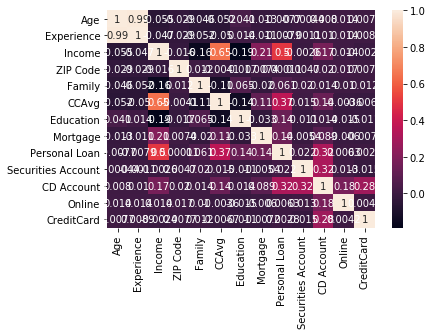

In [270]:
sns.heatmap(corr_matrix, annot = True)
plt.show()

Observations
-------------------

1. Age and Experience are highly positively correlated (0.994215)

2. Age and Experience are negatively correlated with target feature Personal Loan and the respective correlation coefficients are very low -0.007726 and -0.007413 respectively.

3. Income is positively correlated with CCAvg (0.645984) and Personal Loan (0.502462)

4. ZIP Code and Family are not having significant correlation with any of other features

5. Personal Loan is positively correlated with CCAvg(0.366889) and CDAccount(0.316355)

6. Securities Account is positively correlated with CDAccount (0.317034)

# Pairplots

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


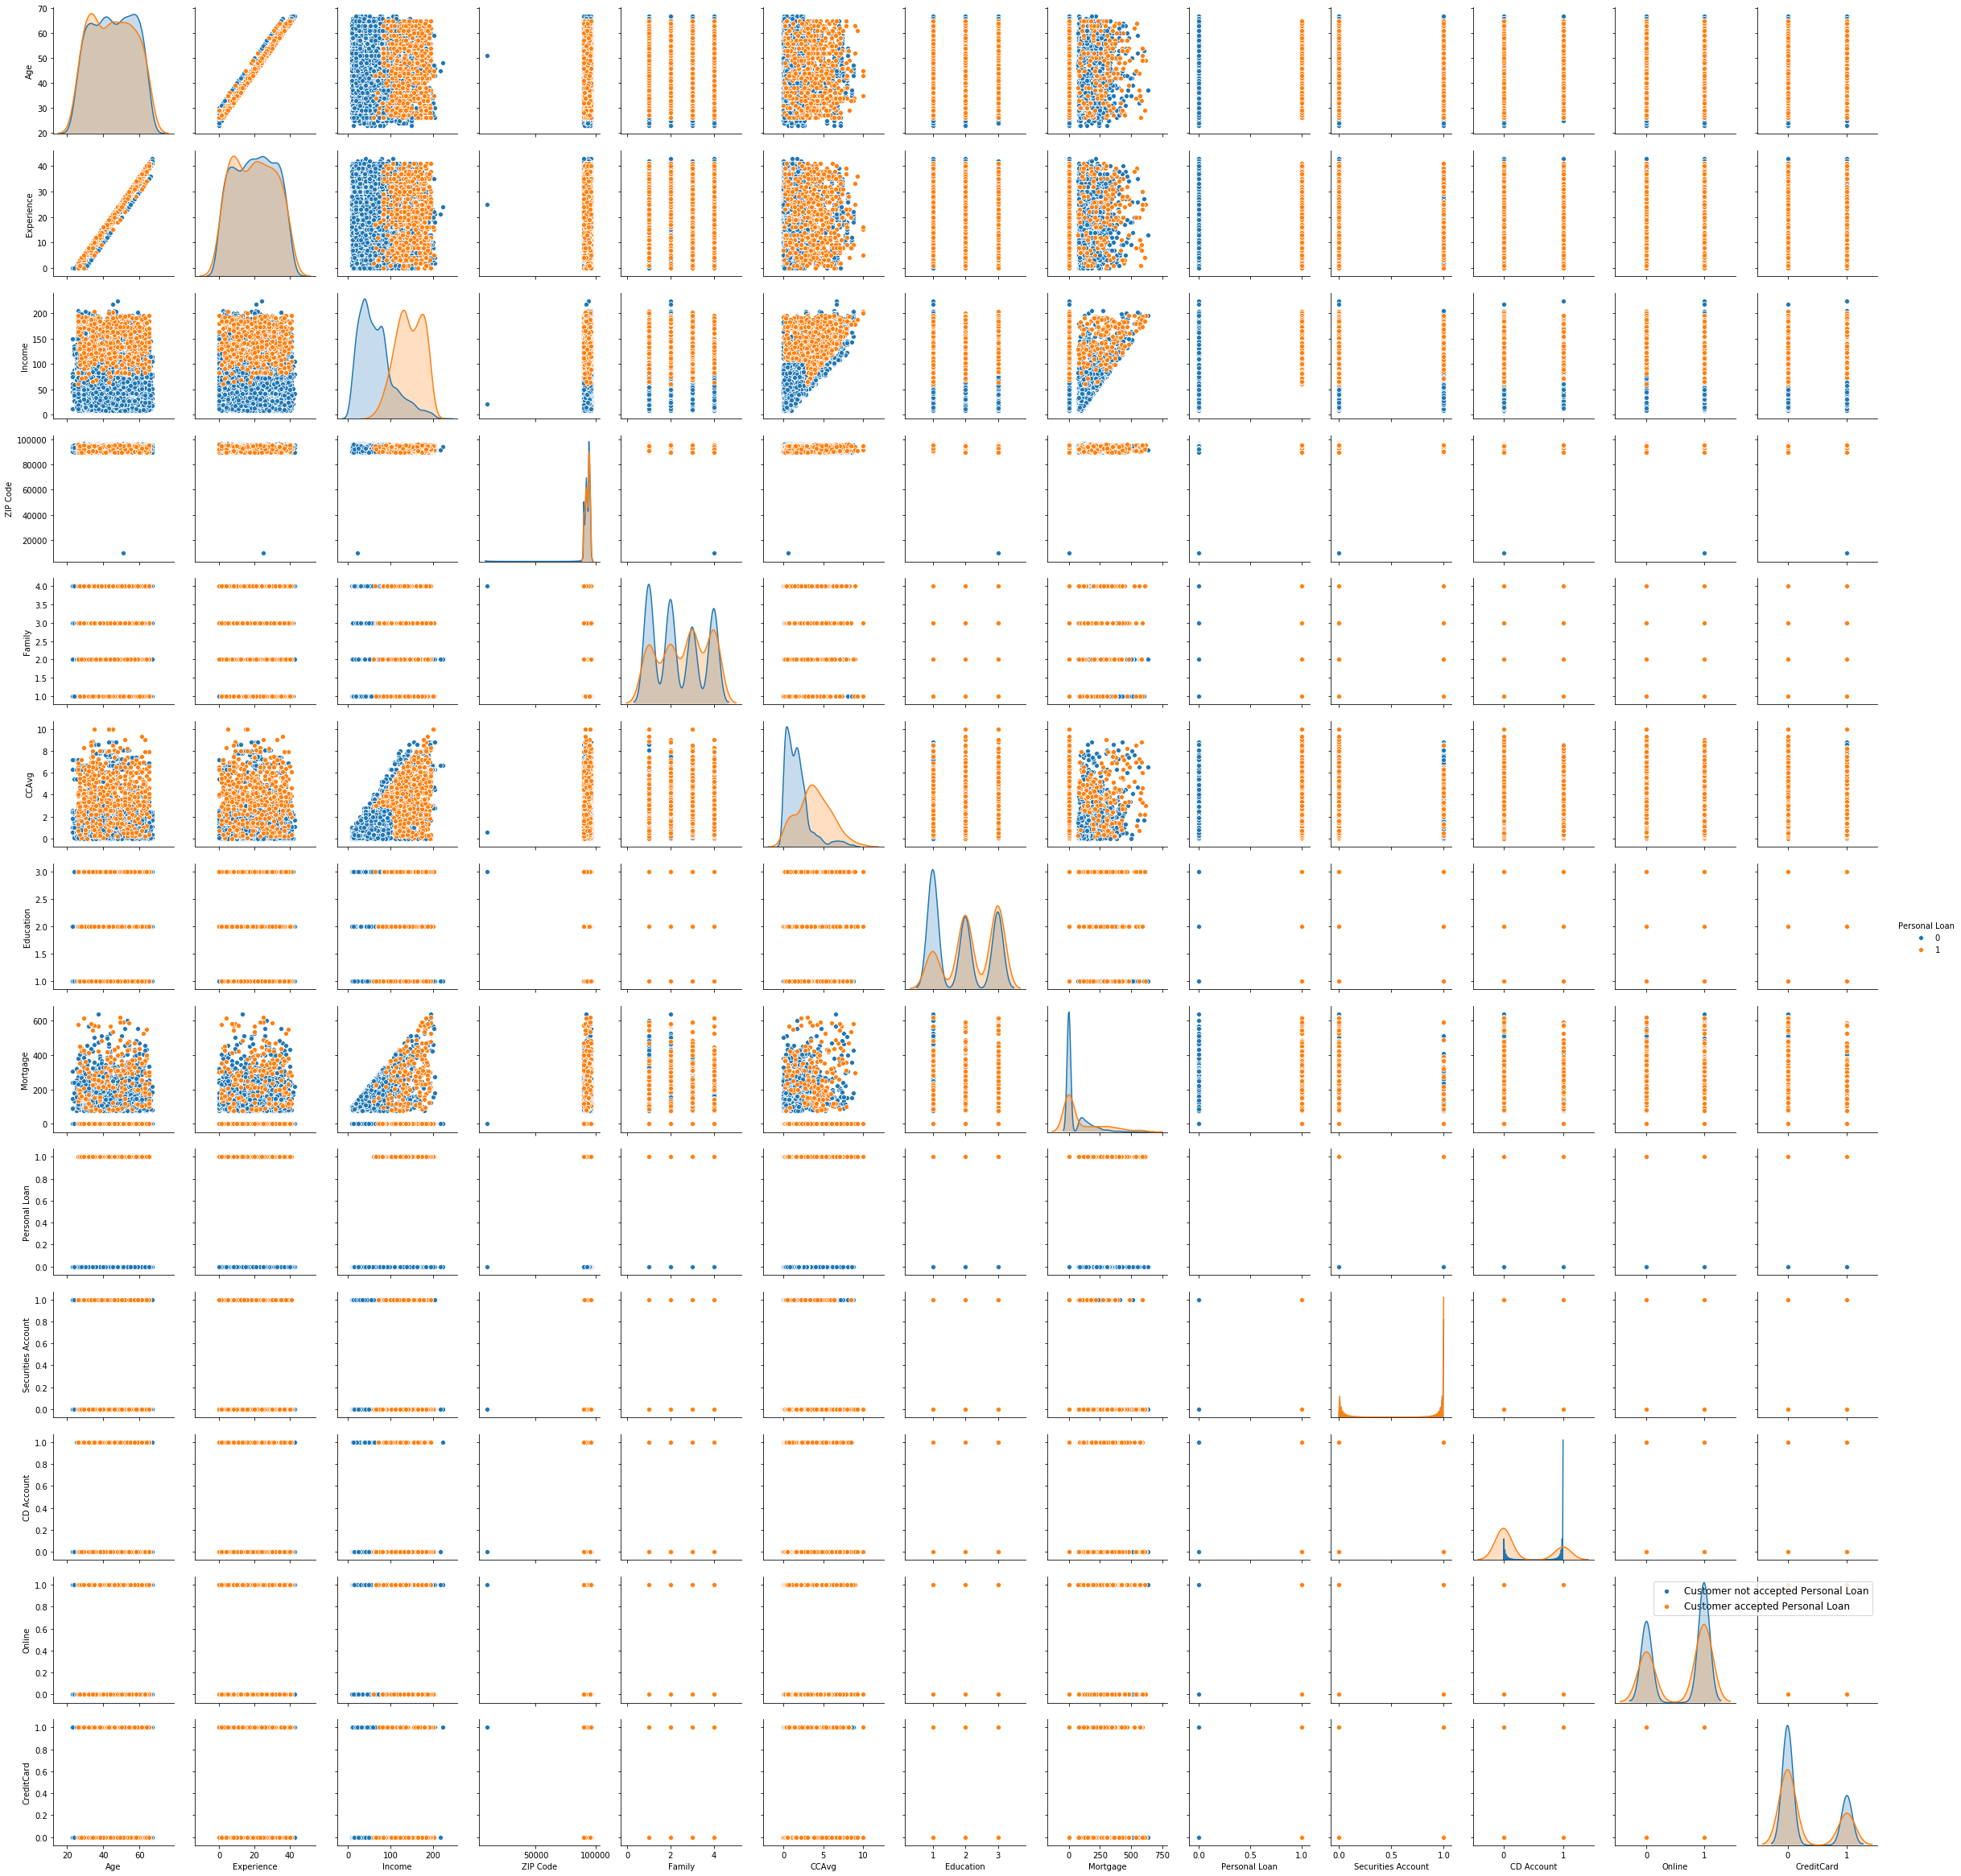

In [271]:
sns.pairplot(data=bank_df, hue='Personal Loan')
l = plt.legend(loc='upper right',fontsize='large')
l.get_texts()[0].set_text('Customer not accepted Personal Loan')
l.get_texts()[1].set_text('Customer accepted Personal Loan')
plt.show()

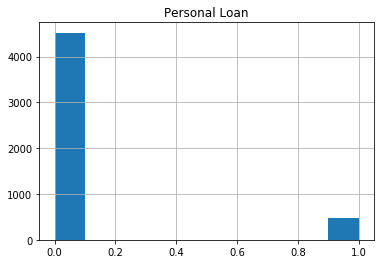

In [272]:
bank_df.hist(column=['Personal Loan'])
plt.show()

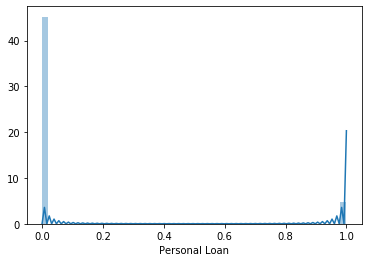

In [273]:
sns.distplot(bank_df['Personal Loan'], hist = True)
plt.show()

In [274]:
X = bank_df.drop('Personal Loan', axis = 1)

y = bank_df['Personal Loan']

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 6)

# Feature Selection

In [276]:
NNH = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')

Forward Selection
----------------

In [277]:
sfs1 = sfs(NNH, k_features = 12, forward = True, scoring = 'accuracy', cv = 5)

In [278]:
sfs1.fit(X_train.values, y_train.values)

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=KNeighborsClassifier(algorithm='auto',
                                                         leaf_size=30,
                                                         metric='minkowski',
                                                         metric_params=None,
                                                         n_jobs=None,
                                                         n_neighbors=3, p=2,
                                                         weights='distance'),
                          floating=False, forward=True, k_features=12, n_jobs=1,
                          pre_dispatch='2*n_jobs', scoring='accuracy',
                          verbose=0)

In [279]:
sfs1.get_metric_dict()

{1: {'feature_idx': (9,),
  'cv_scores': array([0.90299572, 0.90870185, 0.90285714, 0.90128755, 0.90414878]),
  'avg_score': 0.9039982110750664,
  'feature_names': ('9',),
  'ci_bound': 0.003241463002987118,
  'std_dev': 0.0025219683394759203,
  'std_err': 0.0012609841697379602},
 2: {'feature_idx': (5, 9),
  'cv_scores': array([0.91155492, 0.91155492, 0.91571429, 0.91845494, 0.91273247]),
  'avg_score': 0.9140023078764301,
  'feature_names': ('5', '9'),
  'ci_bound': 0.003465456916192759,
  'std_dev': 0.0026962432137593423,
  'std_err': 0.0013481216068796712},
 3: {'feature_idx': (5, 6, 9),
  'cv_scores': array([0.94436519, 0.94864479, 0.93857143, 0.94849785, 0.94992847]),
  'avg_score': 0.9460015475250241,
  'feature_names': ('5', '6', '9'),
  'ci_bound': 0.005346666030328921,
  'std_dev': 0.004159887815413862,
  'std_err': 0.0020799439077069308},
 4: {'feature_idx': (4, 5, 6, 9),
  'cv_scores': array([0.95577746, 0.95007133, 0.95857143, 0.9527897 , 0.95422031]),
  'avg_score': 0.954

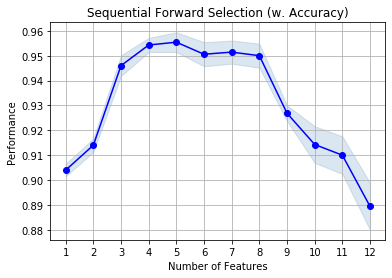

In [280]:
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. Accuracy)')
plt.grid()
plt.show()

# Observations

1. In Forward Selection, the optimal value for number of features is k = 6 in case of K-Nearest Neighbor Classifier.

In [281]:
sfs1 = sfs(NNH, k_features = 6, forward = True, scoring = 'accuracy', cv = 5)

In [282]:
sfs1.fit(X_train.values, y_train.values)

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=KNeighborsClassifier(algorithm='auto',
                                                         leaf_size=30,
                                                         metric='minkowski',
                                                         metric_params=None,
                                                         n_jobs=None,
                                                         n_neighbors=3, p=2,
                                                         weights='distance'),
                          floating=False, forward=True, k_features=6, n_jobs=1,
                          pre_dispatch='2*n_jobs', scoring='accuracy',
                          verbose=0)

In [283]:
sfs1.get_metric_dict()

{1: {'feature_idx': (9,),
  'cv_scores': array([0.90299572, 0.90870185, 0.90285714, 0.90128755, 0.90414878]),
  'avg_score': 0.9039982110750664,
  'feature_names': ('9',),
  'ci_bound': 0.003241463002987118,
  'std_dev': 0.0025219683394759203,
  'std_err': 0.0012609841697379602},
 2: {'feature_idx': (5, 9),
  'cv_scores': array([0.91155492, 0.91155492, 0.91571429, 0.91845494, 0.91273247]),
  'avg_score': 0.9140023078764301,
  'feature_names': ('5', '9'),
  'ci_bound': 0.003465456916192759,
  'std_dev': 0.0026962432137593423,
  'std_err': 0.0013481216068796712},
 3: {'feature_idx': (5, 6, 9),
  'cv_scores': array([0.94436519, 0.94864479, 0.93857143, 0.94849785, 0.94992847]),
  'avg_score': 0.9460015475250241,
  'feature_names': ('5', '6', '9'),
  'ci_bound': 0.005346666030328921,
  'std_dev': 0.004159887815413862,
  'std_err': 0.0020799439077069308},
 4: {'feature_idx': (4, 5, 6, 9),
  'cv_scores': array([0.95577746, 0.95007133, 0.95857143, 0.9527897 , 0.95422031]),
  'avg_score': 0.954

In [284]:
columnList = list(X_train.columns)

feat_col = list(sfs1.k_feature_idx_)

feat_col

[2, 4, 5, 6, 8, 9]

In [285]:
subsetColumnList = [columnList[i] for i in feat_col]

subsetColumnList

['Income', 'Family', 'CCAvg', 'Education', 'Securities Account', 'CD Account']

# Backward Elimination

In [286]:
sfs1 = sfs(NNH, k_features = 2, forward = False, scoring = 'accuracy', cv = 5)

In [287]:
sfs1.fit(X_train.values, y_train.values)

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=KNeighborsClassifier(algorithm='auto',
                                                         leaf_size=30,
                                                         metric='minkowski',
                                                         metric_params=None,
                                                         n_jobs=None,
                                                         n_neighbors=3, p=2,
                                                         weights='distance'),
                          floating=False, forward=False, k_features=2, n_jobs=1,
                          pre_dispatch='2*n_jobs', scoring='accuracy',
                          verbose=0)

In [288]:
sfs1.get_metric_dict()

{12: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11),
  'cv_scores': array([0.88587732, 0.89586305, 0.87285714, 0.89985694, 0.89270386]),
  'avg_score': 0.8894316629800703,
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '11'),
  'ci_bound': 0.01216763290943862,
  'std_dev': 0.009466831778024593,
  'std_err': 0.0047334158890122964},
 11: {'feature_idx': (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11),
  'cv_scores': array([0.90156919, 0.91726106, 0.9       , 0.91559371, 0.91559371]),
  'avg_score': 0.9100035306194503,
  'feature_names': ('0', '1', '2', '4', '5', '6', '7', '8', '9', '10', '11'),
  'ci_bound': 0.009727207928300178,
  'std_dev': 0.0075680982334413215,
  'std_err': 0.0037840491167206603},
 10: {'feature_idx': (0, 1, 2, 4, 5, 6, 8, 9, 10, 11),
  'cv_scores': array([0.92582026, 0.91726106, 0.91428571, 0.93133047, 0.91702432]),
  'avg_score': 0.9211443638514714,
  'feature_names': ('0', '1', '2', '4', '5', '6', '8', '9',

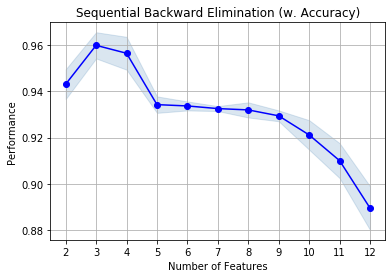

In [289]:
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Backward Elimination (w. Accuracy)')
plt.grid()
plt.show()

Observations
-------------------

1. For Backward Selection, the optimal value of k i.e.number of features is 5.

In [290]:
sfs1 = sfs(NNH, k_features = 5, forward = False, scoring = 'accuracy', cv = 5)

In [291]:
sfs1.fit(X_train.values, y_train.values)

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=KNeighborsClassifier(algorithm='auto',
                                                         leaf_size=30,
                                                         metric='minkowski',
                                                         metric_params=None,
                                                         n_jobs=None,
                                                         n_neighbors=3, p=2,
                                                         weights='distance'),
                          floating=False, forward=False, k_features=5, n_jobs=1,
                          pre_dispatch='2*n_jobs', scoring='accuracy',
                          verbose=0)

In [292]:
feat_col = sfs1.k_feature_idx_

print(feat_col)

(1, 4, 5, 6, 8)


In [293]:
subsetColumnList = [columnList[i] for i in feat_col]

subsetColumnList

['Experience', 'Family', 'CCAvg', 'Education', 'Securities Account']

# Observations

1. From both Forward Selection and Backward Elimination, we can conclude that the feature ZIP code does not add any value to model performance. So we can the drop the ZIP Code feature from the DataFrame.

# Separate Features & Labels

In [294]:
features_df = bank_df.drop(['ZIP Code', 'Personal Loan'], axis = 1)

In [295]:
labels = bank_df['Personal Loan']

# Classification Model - 1 : KNearestNeighbors

In [296]:
X = np.array(zscore(features_df))

y = np.array((labels))

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 5)

In [298]:
X_train

array([[-1.33819353, -1.32171963,  1.46050569, ..., -0.25354028,
         0.82195086, -0.64531434],
       [-1.77441684, -1.67139016, -1.32034226, ..., -0.25354028,
        -1.21661774,  1.54963239],
       [-0.46574691, -0.36012568,  0.89564595, ..., -0.25354028,
         0.82195086, -0.64531434],
       ...,
       [ 1.71536965,  1.73789749,  0.02663096, ..., -0.25354028,
         0.82195086, -0.64531434],
       [ 0.05772107,  0.16438012, -0.45132728, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.98921488, -0.9720491 ,  1.28670269, ..., -0.25354028,
         0.82195086, -0.64531434]])

In [299]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [300]:
NNH = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')

In [301]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [302]:
y_pred_train = NNH.predict(X_train)

In [303]:
y_pred_test = NNH.predict(X_test)

In [304]:
NNH.score(X_train, y_train)

1.0

In [305]:
NNH.score(X_test, y_test)

0.9586666666666667

In [306]:
print(confusion_matrix(y_test, y_pred_test))

[[1344    7]
 [  55   94]]


In [307]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1351
           1       0.93      0.63      0.75       149

    accuracy                           0.96      1500
   macro avg       0.95      0.81      0.86      1500
weighted avg       0.96      0.96      0.96      1500



# Observations

From the Classification Report and because the dataset is imbalanced. It contains only 480 customers who accepted the personal Loan in the last campaign out of 5000 customers

1. The model's recall is very low with respect to the customers who accepted the personal loan in the last campign i.e.it can only be able to predict 63%.

2. The model is more biased towards customers who didn't accepted the personal loan in the last campaign, So the f1 score for the class customers who accepted the personal loan is very low (98%) when compared to the f1 score for the class customers who didn't accepted the personal loan(75%).

3. Eventhough for both classes, the precision and accuracy are high, KNN is not good model for this dataset.

# Classification Model - 2 : Logistic Regression

In [308]:
model2 = LogisticRegression()

In [309]:
model2.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [310]:
y_pred_train = model2.predict(X_train)

In [311]:
y_pred_test = model2.predict(X_test)

In [312]:
model2.score(X_train, y_train)

0.9522857142857143

In [313]:
model2.score(X_test, y_test)

0.9526666666666667

In [314]:
print(confusion_matrix(y_test, y_pred_test))

[[1335   16]
 [  55   94]]


In [315]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.85      0.63      0.73       149

    accuracy                           0.95      1500
   macro avg       0.91      0.81      0.85      1500
weighted avg       0.95      0.95      0.95      1500



# Observations

When Compared model2 i.e.Logistic Regression with model-1 i.e KNN

1. There is no change in the recall of the class with respect to customers who accepted the personal loan in the last campaign.

2. The precision of the class with respect to customers who accepted the personal loan is further reduced (85%)

3. The f1 score is further reduced for the class customers who accepted the personal loan(73%).

4. The accuracy is almost same on both training and test datasets.

In [316]:
model3 = GaussianNB()

In [317]:
model3.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [318]:
y_pred_train = model3.predict(X_train)

In [319]:
y_pred_test = model3.predict(X_test)

In [320]:
model3.score(X_train, y_train)

0.8848571428571429

In [321]:
model3.score(X_test, y_test)

0.8746666666666667

In [322]:
print(confusion_matrix(y_test, y_pred_test))

[[1230  121]
 [  67   82]]


In [323]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.40      0.55      0.47       149

    accuracy                           0.87      1500
   macro avg       0.68      0.73      0.70      1500
weighted avg       0.89      0.87      0.88      1500



# Observations

1. The model's recall and f1-score is further more reduced to 55% and 47% respectively with respect to the class customers who accepted the personal loan in the last campaign.

2. Also compared to the above two models, the naive bayes model precision is very very low for the class customers who accepted the personal loan in the last campaign which is 40%.

# Conclusion from above 3 Models

1. Among the three models, KNN is the best model is best for this datasetand with repect to the classification metrics calculated.

2. The f1 score is better for KNN among the three models also the precision for both the classes i.e.customers who didn't accepted the personal loan and customers who accepted the personal loan are high when compared to remaining two models i.e. Logistic Regression and Naive Bayes.

In [324]:
#filter1 = bank_df['Experience'] < 0
filter2 = bank_df['Personal Loan'] == 0

In [325]:
bank_df[filter1 & filter2].shape

(52, 13)

In [326]:
filter2 = bank_df['Personal Loan'] == 1

In [327]:
bank_df[filter1 & filter2]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


# Additional Conclusion to improve the Model accuracy

1. Because the dataset is biased more towards the class customers who didn't accepted the personal loan, for the KNN also the recall and f1 score are low but those are high when compared with remaining models.

2. Also we got around 52 customer records for which experience is represend in negative and as part of data preprocessing, replaced experience for those records with 0. Instead we should get know about the respective domain and reason why the experience the experience is represented as negative. Based on the reason treat the negative experience values.

3. Instead of replacing negative experience with 0, if we apply mod or absolute operation on the experience feature then thos 52 customer data points will be included in the model prediction with respect to the class customers who didn't accepted the personal loan in the last campaign because all the customers with negative experince didn't accepted the personal loan in the last campaign.

4. To improve the model precition with respect to the class customers who accepted the personal loan, more data points related to the same class are required in the given dataset.